In [886]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
mM = AHM.Model(Del0A = 0.2, Del0B=0, Del0C= -0.2, na=1, nb=1, nc=1, U=0.2, t=1, inhomp=False, inhomi=True)

H = mM.HBdG()


In [887]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

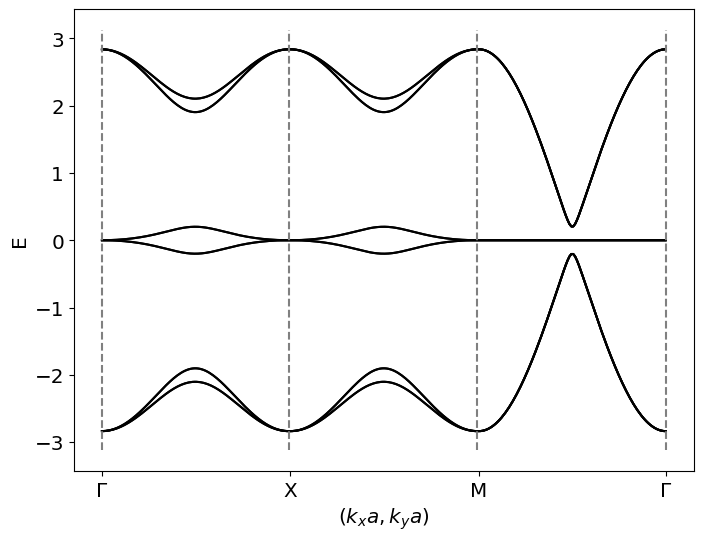

In [888]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpath.png")
plt.show()

In [889]:
degen = []

sum(degen)


0

In [927]:
evals, Evec = np.linalg.eig(H(k[40], k[40]))
Evec = Evec.T
Evec[np.abs(Evec)<1e-15]=0
evals[np.abs(evals)<1e-15]=0

sortedEVals = np.zeros(12)
indexmap = np.zeros(12)
degen = []
c=0
d =0
inbet = np.unique(evals)[::-1]
l=np.shape(inbet)[0]
for t in range(l):
    for i, j in enumerate(evals):
        if j == inbet[t]:
            indexmap[sum(degen)+d]=i
            d+=1
    
    sortedEVals[sum(degen):sum(degen)+d]=inbet[t]
    degen.append(d)              
    
    d=0
    c+=1

sortedEVals

C:\Users\atsch\AppData\Local\Temp\ipykernel_10820\811507495.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]


array([ 0.86330393,  0.86330393,  0.86330393,  0.86330393,  0.        ,
        0.        ,  0.        ,  0.        , -0.86330393, -0.86330393,
       -0.86330393, -0.86330393])

In [928]:
Carr = np.zeros((12,12))
#Evec = np.linalg.eig(H(k[0], k[0]))[1]
for i in range(12):
    Carr[i]=Evec[int(indexmap[i])]
Carr=np.round(Carr, 6)

C:\Users\atsch\AppData\Local\Temp\ipykernel_10820\3914856076.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Carr[i]=Evec[int(indexmap[i])]


In [929]:
indexmap

array([ 4.,  0.,  6.,  2.,  8.,  9., 10., 11.,  1.,  3.,  5.,  7.])

In [936]:
Evec

array([[-0.51324217+0.j,  0.67012211+0.j, -0.4609568 +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.22569085+0.j, -0.15524593+0.j,  0.        +0.j],
       [ 0.51317218+0.j,  0.66746693+0.j,  0.4571668 +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.23327248+0.j,  0.16629141+0.j, -0.00847587+0.j],
       [ 0.00932651-0.j,  0.14304301-0.j, -0.21727719+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.46498188-0.j,  0.67283255+0.j,  0.51315743-0.j],
       [-0.03264622+0.j, -0.19558068+0.j, -0.25168181+0.j,
         0.08151927+0.j,  0.1058614 +0.j,  0.07237816+0.j,
         0.03755545+0.j, -0.02714181+0.j,  0.00190232+0.j,
        -0.43980085+0.j,  0.6503613 +0.j, -0.50567059+0.j],
       [ 0.00098149+0.j, -0.01761627+0.j,  0.0246284

In [931]:
Carr

array([[ 0.000981, -0.017616,  0.024628, -0.510253,  0.662618, -0.453036,
         0.235071,  0.169889,  0.011907, -0.04807 , -0.070213, -0.054003],
       [-0.513242,  0.670122, -0.460957,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      , -0.225691, -0.155246,  0.      ],
       [ 0.000992,  0.008611, -0.01351 , -0.027905, -0.118264,  0.199833,
         0.471604,  0.676203,  0.511435,  0.02985 ,  0.043061,  0.03275 ],
       [ 0.009327,  0.143043, -0.217277,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.464982,  0.672833,  0.513157],
       [-0.420735, -0.182373,  0.420735,  0.053281,  0.003042, -0.053281,
        -0.009031,  0.017945,  0.009031, -0.541504,  0.1417  ,  0.541504],
       [ 0.516097, -0.048664, -0.516097,  0.329861,  0.093529, -0.329861,
        -0.277708,  0.111094,  0.277708, -0.144494, -0.173817,  0.144494],
       [ 0.523762, -0.067948, -0.523762, -0.297489, -0.088874,  0.297489,
         0.263885, -0.100191, -0

In [932]:
degen

[1, 1, 1, 1, 4, 1, 2, 1]

In [933]:
Uarr = np.zeros((12,12))
c=0
for t in range(6):
    for j in range(1,len(degen)):
        
        for l in range(degen[j]):
            #for s in range(6):
                #if Carr[t, s]==Carr[j*degen[j]+l, s+6]:
                #    c+=1
            #print(j*degen[j]+l, c)
            if c==6:
                #Uarr[t]=Carr[t]
                #Uarr[t+6]=Carr[j*degen[j]+l]
                print(t)              
            c=0

In [934]:
Uarr = np.zeros((12,12))
c=0
c2=0
for t in range(6):
    for j in range(6,12):
    
        for s in range(6):
            if (Carr[t, s]==Carr[j, s+6] and Carr[t, s+6]==Carr[j, s]) or (Carr[t, s]==Carr[j, s+6]*(-1) and Carr[t, s+6]==Carr[j, s]*(-1)):
                c+=1
                
                
            if Carr[t, s]==Carr[j, s+6]*(-1) and Carr[t, s+6]==Carr[j, s]*(-1):
                c2+=1
                
        if c2==6:
            Carr[j]=Carr[j]*(-1)
        if c==6:
            Uarr[t]=Carr[t]
            Uarr[t+6]=Carr[j]
            print(t)              
        c=0
        c2=0


In [935]:
Uarr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [899]:
Carr[0, :6]

array([ 0.000981, -0.017616,  0.024628, -0.510253,  0.662618, -0.453036])

In [900]:
Carr[11,6:]==Carr[0, :6]

array([False, False, False, False, False, False])

In [901]:
D = np.diag(sortedEVals)

In [902]:
np.matmul(H(k[0], k[0]),Evec[0])

array([-1.38538239e+00+0.j,  1.94839795e+00+0.j, -1.34024422e+00+0.j,
        5.71627370e-33+0.j, -1.40411178e-32+0.j,  5.50977089e-33+0.j,
       -1.81230171e-33+0.j, -2.06502807e-33+0.j, -4.08189924e-34+0.j,
       -4.13140296e-01+0.j, -4.51381694e-01+0.j, -2.18300501e-01+0.j])

In [903]:
np.shape(np.linalg.eig(H(k[0], k[0]))[1])

(12, 12)

In [904]:
indexmap

array([ 4.,  0.,  6.,  2., 11.,  8.,  9., 10.,  1.,  3.,  5.,  7.])

In [905]:
Uarr[0, 0]

0.0

In [906]:
Uarr[6, 6]

0.0

In [907]:
sortedEVals

array([ 8.63303929e-01,  8.63303929e-01,  8.63303929e-01,  8.63303929e-01,
        5.68289442e-17, -1.11776028e-17, -5.54962717e-17, -5.84721662e-17,
       -8.63303929e-01, -8.63303929e-01, -8.63303929e-01, -8.63303929e-01])

In [908]:
Uarr[0:6, 0:6]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [909]:
Uarr[6:, 6:]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [910]:
Uarr[6:, 0:6]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [911]:
Uarr[0:6, 6:]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [912]:
H(k[0], k[0])

array([[ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j],
       [-2. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
        -0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j, -2. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0.

In [913]:
np.diag(np.matmul(Uarr,np.matmul(H(k[0], k[0]), Uarr.T)))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [875]:
u=Uarr[0:6, 0:6]
v=Uarr[0:6,6:]

In [876]:
np.matmul(u, v)[1, 4]

0.0

In [877]:
np.matmul(u.T, v)

array([[ 0.        ,  0.        ,  0.        ,  0.50000031,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.50000031],
       [-0.50000031,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.50000031,  0.        ,  0.        ,
         0.        ]])

In [878]:
np.matmul(v.T, u)

array([[ 0.        ,  0.        ,  0.        , -0.50000031,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.50000031],
       [ 0.50000031,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.50000031,  0.        ,  0.        ,
         0.        ]])

In [879]:
Uarr

array([[ 0.707107, -0.      , -0.      , -0.      , -0.      , -0.      ,
        -0.      , -0.      , -0.      ,  0.707107, -0.      , -0.      ],
       [ 0.      ,  0.      , -0.707107,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.707107],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.707107,
         0.      ,  0.      ,  0.707107,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.707107,  0.      ,  0.      ,
        -0.707107,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  1.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  1.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.707107,  0.      ,  0.      ,
         0.707107,  0.      ,  0

In [880]:
Delta = mM.rel_err(k[40], k[40])

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:122: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]
c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  Carr[i]=Evec[int(indexmap[i])]


In [881]:
np.diag(np.matmul(Uarr,np.matmul(H(k[0], k[0]), Uarr.T)))

array([ 0.10000006+0.j,  0.10000006+0.j,  0.10000006+0.j,  0.10000006+0.j,
        0.        +0.j,  0.        +0.j, -0.10000006+0.j, -0.10000006+0.j,
       -0.10000006+0.j, -0.10000006+0.j,  0.        +0.j,  0.        +0.j])

In [937]:
dan, dbn, dcn = (0.2, 0, -0.2)
dels = []
r = []
for i in range(20):
    print(i, (dan, dbn, dcn))
    dels.append([dan, dbn, dcn])
    da, db, dc = (dan, dbn, dcn)
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=0.2, t=0, inhomp=False, inhomi=True)
    Delta = mM.rel_err(k[40], k[40])
    dan=Delta[3,0]*mM.U
    dbn=Delta[4, 1]*mM.U
    dcn=Delta[5, 2]*mM.U
    
    err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]
    r.append(err)

r=np.array(r)

0 (0.2, 0, -0.2)
1 (-0.10000006188980003, 0.0, 0.10000006188980003)
2 (0.10000006188980003, 0.0, -0.10000006188980003)
3 (-0.10000006188980003, 0.0, 0.10000006188980003)
4 (0.10000006188980003, 0.0, -0.10000006188980003)
5 (-0.10000006188980003, 0.0, 0.10000006188980003)
6 (0.10000006188980003, 0.0, -0.10000006188980003)
7 (-0.10000006188980003, 0.0, 0.10000006188980003)
8 (0.10000006188980003, 0.0, -0.10000006188980003)
9 (-0.10000006188980003, 0.0, 0.10000006188980003)
10 (0.10000006188980003, 0.0, -0.10000006188980003)
11 (-0.10000006188980003, 0.0, 0.10000006188980003)
12 (0.10000006188980003, 0.0, -0.10000006188980003)
13 (-0.10000006188980003, 0.0, 0.10000006188980003)
14 (0.10000006188980003, 0.0, -0.10000006188980003)
15 (-0.10000006188980003, 0.0, 0.10000006188980003)
16 (0.10000006188980003, 0.0, -0.10000006188980003)
17 (-0.10000006188980003, 0.0, 0.10000006188980003)
18 (0.10000006188980003, 0.0, -0.10000006188980003)
19 (-0.10000006188980003, 0.0, 0.10000006188980003)


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:122: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]
c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  Carr[i]=Evec[int(indexmap[i])]
C:\Users\atsch\AppData\Local\Temp\ipykernel_10820\1042144063.py:14: RuntimeWarning: invalid value encountered in scalar divide
  err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]


In [842]:
r

array([[2.99999876,        nan, 2.99999876],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ],
       [2.        ,        nan, 2.        ]])